# Regularización Lasso para Predicción de Humedad/Temperatura
Este notebook implementa un modelo de regresión con regularización Lasso para predecir valores continuos, e incluye análisis de curvas de aprendizaje, validación, paridad, sesgo-varianza y explicaciones breves.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve, validation_curve, cross_val_score
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
# Cargar el dataset (ajusta la ruta si es necesario)
dataset = pd.read_csv('../dataset/ML1_temperature.xlsx - Hoja1.csv', decimal=',')
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1:].values

In [16]:
# Separar en entrenamiento y validación
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
# Entrenamiento del modelo Lasso y predicción
model = Lasso(alpha=1.0, max_iter=10000, random_state=42)
model.fit(x_train, y_train.ravel())
y_val_pred = model.predict(x_val)
y_train_pred = model.predict(x_train)

## Curva de aprendizaje
La curva de aprendizaje muestra cómo varía el error a medida que aumenta el tamaño del conjunto de entrenamiento.

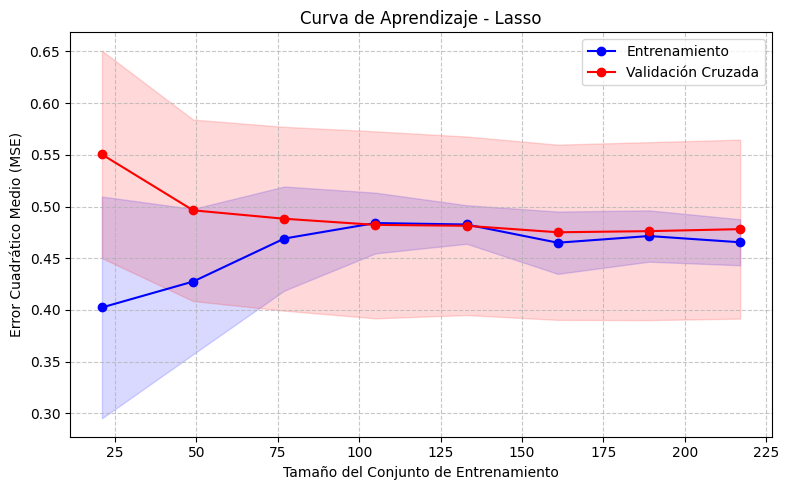

Análisis de la curva de aprendizaje:
- MSE Final Entrenamiento: 0.4654
- MSE Final Validación: 0.4781
- Diagnóstico: BALANCE


In [18]:
# Curva de aprendizaje avanzada para Lasso (formato regresion_no_lineal_2)
from sklearn.model_selection import learning_curve
train_sizes, train_scores, val_scores = learning_curve(Lasso(alpha=1.0, max_iter=10000), x_train, y_train.ravel(), cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 8), shuffle=True, random_state=42)
train_scores_mean = -train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
val_scores_mean = -val_scores.mean(axis=1)
val_scores_std = val_scores.std(axis=1)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Entrenamiento')
plt.plot(train_sizes, val_scores_mean, 'o-', color='red', label='Validación Cruzada')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color='blue', alpha=0.15)
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, color='red', alpha=0.15)
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.title('Curva de Aprendizaje - Lasso')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Análisis automático
print('Análisis de la curva de aprendizaje:')
print(f'- MSE Final Entrenamiento: {train_scores_mean[-1]:.4f}')
print(f'- MSE Final Validación: {val_scores_mean[-1]:.4f}')
if train_scores_mean[-1] > 1 and val_scores_mean[-1] > 1:
    print('- Diagnóstico: SUBAJUSTE')
elif abs(train_scores_mean[-1] - val_scores_mean[-1]) > 1:
    print('- Diagnóstico: SOBREAJUSTE')
else:
    print('- Diagnóstico: BALANCE')

## Curva de validación
La curva de validación muestra el desempeño del modelo para diferentes valores de alpha (parámetro de regularización).

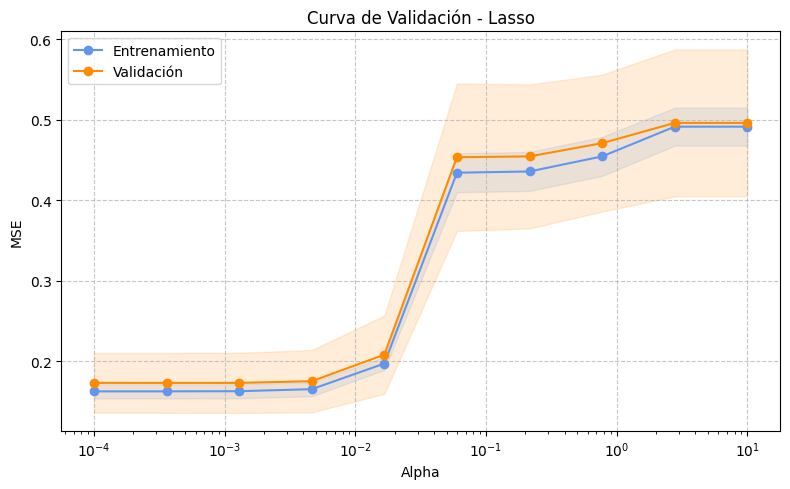

Mejor alpha: 0.0003594


In [19]:
# Curva de validación avanzada para Lasso (formato regresion_no_lineal_2)
alphas = np.logspace(-4, 1, 10)
train_scores, val_scores = validation_curve(Lasso(max_iter=10000), x_train, y_train.ravel(), param_name='alpha', param_range=alphas, cv=5, scoring='neg_mean_squared_error')
train_scores_mean = -train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
val_scores_mean = -val_scores.mean(axis=1)
val_scores_std = val_scores.std(axis=1)

plt.figure(figsize=(8,5))
plt.semilogx(alphas, train_scores_mean, marker='o', color='cornflowerblue', label='Entrenamiento')
plt.semilogx(alphas, val_scores_mean, marker='o', color='darkorange', label='Validación')
plt.fill_between(alphas, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color='cornflowerblue', alpha=0.15)
plt.fill_between(alphas, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, color='darkorange', alpha=0.15)
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('Curva de Validación - Lasso')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Mejor alpha
mejor_indice = np.argmin(val_scores_mean)
mejor_alpha = alphas[mejor_indice]
print(f'Mejor alpha: {mejor_alpha:.4g}')

## Curva de paridad
La curva de paridad compara las predicciones del modelo con los valores reales.

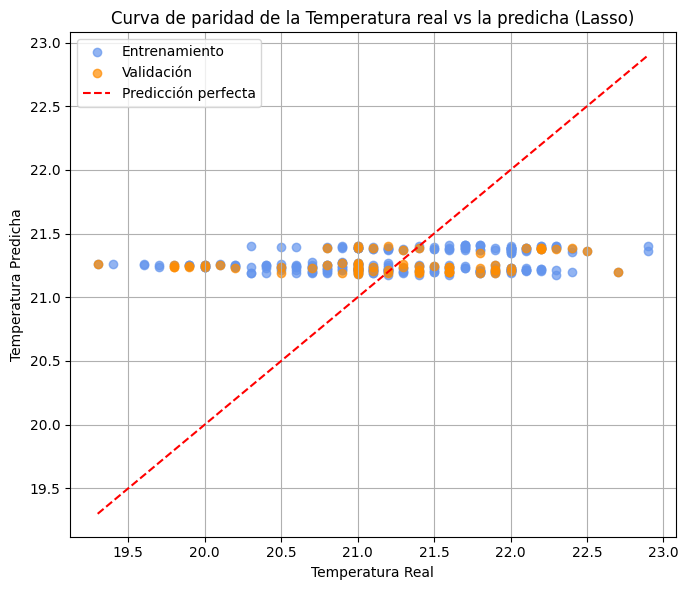

ENTRENANDO MODELO LASSO PARA TEMPERATURA
MSE Entrenamiento: 0.4694
MSE Validación: 0.5199
R² Entrenamiento: 0.0456
R² Validación: 0.0336


In [20]:
# Curva de paridad avanzada: Temperatura Real vs Predicha (Entrenamiento y Validación, Lasso)
plt.figure(figsize=(7,6))
plt.scatter(y_train, model.predict(x_train), alpha=0.7, label='Entrenamiento', color='cornflowerblue')
plt.scatter(y_val, y_val_pred, alpha=0.7, label='Validación', color='darkorange')
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--', label='Predicción perfecta')
plt.xlabel('Temperatura Real')
plt.ylabel('Temperatura Predicha')
plt.title('Curva de paridad de la Temperatura real vs la predicha (Lasso)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print('ENTRENANDO MODELO LASSO PARA TEMPERATURA')
print(f"MSE Entrenamiento: {mean_squared_error(y_train, model.predict(x_train)):.4f}")
print(f"MSE Validación: {mean_squared_error(y_val, y_val_pred):.4f}")
print(f"R² Entrenamiento: {r2_score(y_train, model.predict(x_train)):.4f}")
print(f"R² Validación: {r2_score(y_val, y_val_pred):.4f}")

## Curva de sesgo y varianza
El sesgo y la varianza se pueden analizar observando la diferencia entre el error de entrenamiento y validación. Un sesgo alto implica bajo desempeño en ambos conjuntos, mientras que una varianza alta implica gran diferencia entre ambos errores.

ESTADÍSTICAS DETALLADAS
R² en prueba: 0.0336
Error absoluto promedio: 0.5675
Error máximo: 1.9577
Error mínimo: 0.0092
Desviación estándar del error: 0.4448


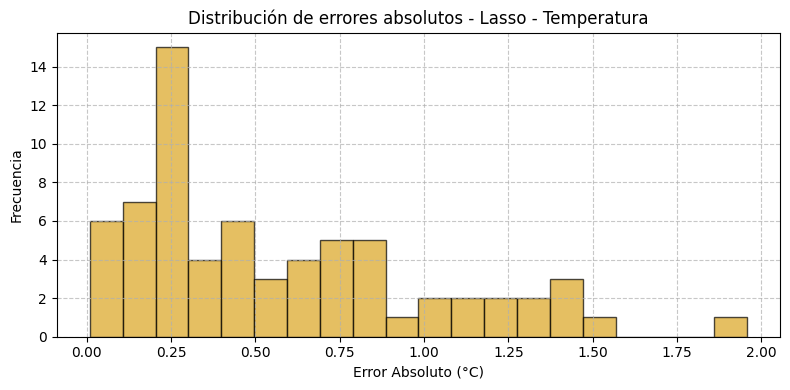

In [25]:
# Estadísticas detalladas y resumen de errores para Temperatura (Lasso)
error_abs = np.abs(y_val.ravel() - y_val_pred.ravel())
err_mean = np.mean(error_abs)
err_max = np.max(error_abs)
err_min = np.min(error_abs)
err_std = np.std(error_abs)

print('ESTADÍSTICAS DETALLADAS')
print(f'R² en prueba: {r2_score(y_val, y_val_pred):.4f}')
print(f'Error absoluto promedio: {err_mean:.4f}')
print(f'Error máximo: {err_max:.4f}')
print(f'Error mínimo: {err_min:.4f}')
print(f'Desviación estándar del error: {err_std:.4f}')

# Histograma de la distribución de errores absolutos (Temperatura)
plt.figure(figsize=(8,4))
plt.hist(error_abs, bins=20, color='goldenrod', edgecolor='black', alpha=0.7)
plt.xlabel('Error Absoluto (°C)')
plt.ylabel('Frecuencia')
plt.title('Distribución de errores absolutos - Lasso - Temperatura')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Explicación breve
Lasso es útil cuando se busca reducir la cantidad de variables (selección de variables) y controlar el sobreajuste. El compromiso sesgo-varianza se ajusta modificando el parámetro alpha.

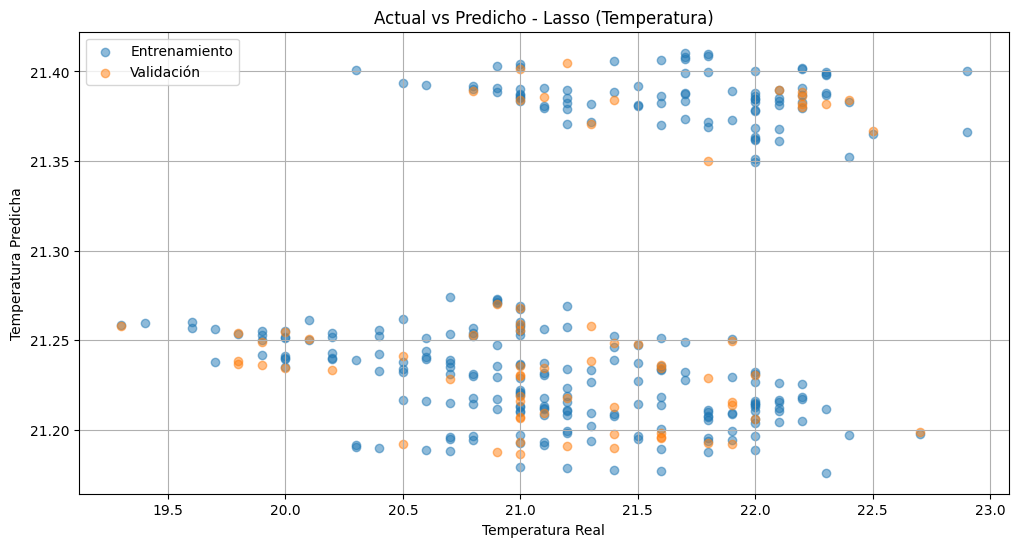

In [22]:
# Actual vs Predicho (Entrenamiento y Validación) - Lasso (Temperatura)
plt.figure(figsize=(12, 6))
plt.scatter(y_train, y_train_pred, alpha=0.5, label='Entrenamiento')
plt.scatter(y_val, y_val_pred, alpha=0.5, label='Validación')
plt.xlabel('Temperatura Real')
plt.ylabel('Temperatura Predicha')
plt.title('Actual vs Predicho - Lasso (Temperatura)')
plt.legend()
plt.grid(True)
plt.show()

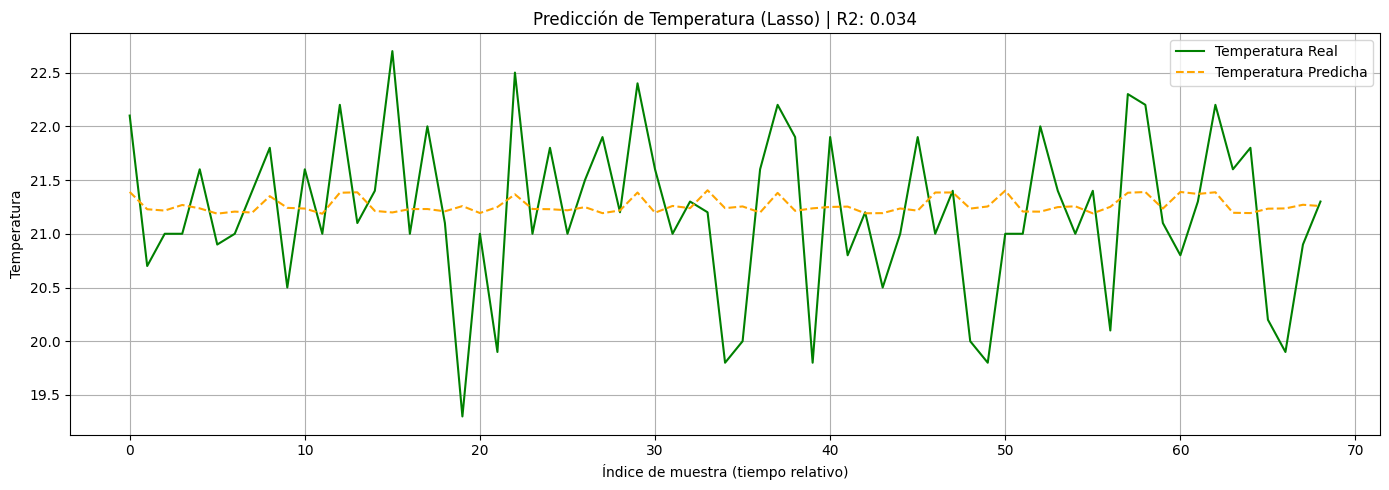

In [26]:
# Serie temporal: Temperatura real vs predicha (validación, Lasso)
plt.figure(figsize=(14,5))
plt.plot(np.arange(len(y_val)), y_val, label='Temperatura Real', color='green')
plt.plot(np.arange(len(y_val_pred)), y_val_pred, label='Temperatura Predicha', color='orange', linestyle='--')
plt.xlabel('Índice de muestra (tiempo relativo)')
plt.ylabel('Temperatura')
plt.title(f'Predicción de Temperatura (Lasso) | R2: {r2_score(y_val, y_val_pred):.3f}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

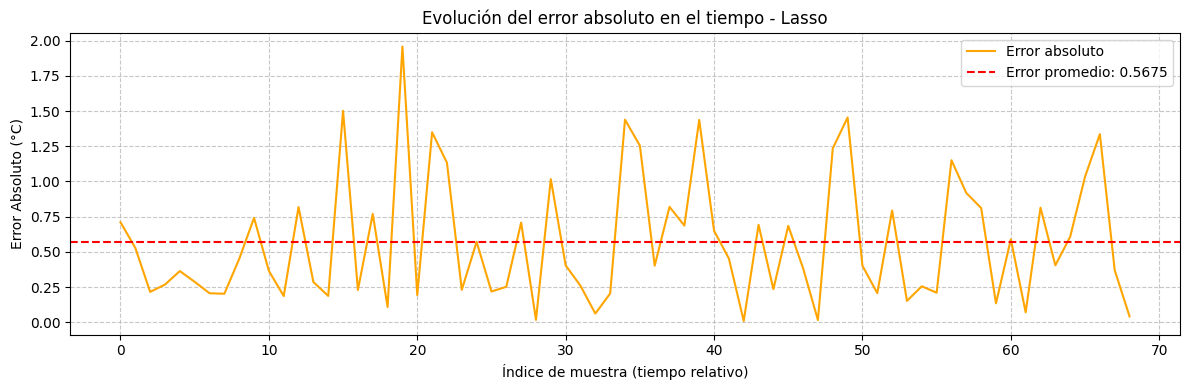

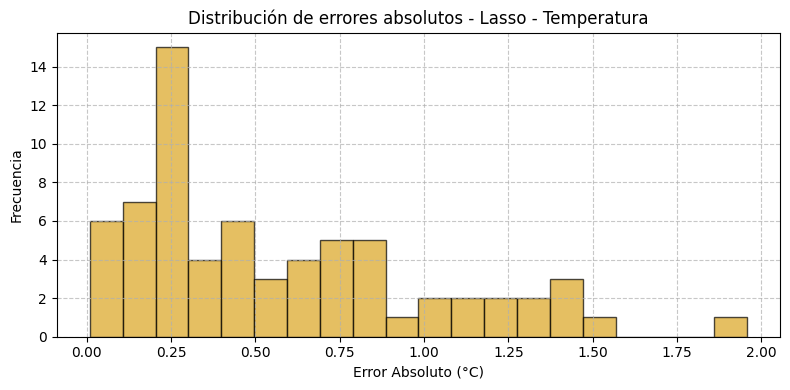

Métrica,Lasso
MSE (Test),0.5199
R² (Test),0.0336
Error Promedio (°C),0.5675
Error Máximo (°C),1.9577
Error Mínimo (°C),0.0092
Desviación Estándar del Error,0.4448


In [24]:
# Gráfica de errores absolutos en el tiempo (Temperatura, Lasso)
error_abs = np.abs(y_val.ravel() - y_val_pred.ravel())
plt.figure(figsize=(12,4))
plt.plot(error_abs, color='orange', label='Error absoluto')
plt.axhline(np.mean(error_abs), color='red', linestyle='--', label=f'Error promedio: {np.mean(error_abs):.4f}')
plt.xlabel('Índice de muestra (tiempo relativo)')
plt.ylabel('Error Absoluto (°C)')
plt.title('Evolución del error absoluto en el tiempo - Lasso')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Histograma de la distribución de errores absolutos (Temperatura, Lasso)
plt.figure(figsize=(8,4))
plt.hist(error_abs, bins=20, color='goldenrod', edgecolor='black', alpha=0.7)
plt.xlabel('Error Absoluto (°C)')
plt.ylabel('Frecuencia')
plt.title('Distribución de errores absolutos - Lasso - Temperatura')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Tabla resumen de métricas para Temperatura (Lasso)
from IPython.display import display, HTML
mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)
err_mean = np.mean(error_abs)
err_max = np.max(error_abs)
err_min = np.min(error_abs)
err_std = np.std(error_abs)

html_table = f'''
<table style="border-collapse:collapse; width:50%">
<tr><th style="border:1px solid black; padding:4px">Métrica</th><th style="border:1px solid black; padding:4px">Lasso</th></tr>
<tr><td style="border:1px solid black; padding:4px">MSE (Test)</td><td style="border:1px solid black; padding:4px">{mse:.4f}</td></tr>
<tr><td style="border:1px solid black; padding:4px">R² (Test)</td><td style="border:1px solid black; padding:4px">{r2:.4f}</td></tr>
<tr><td style="border:1px solid black; padding:4px">Error Promedio (°C)</td><td style="border:1px solid black; padding:4px">{err_mean:.4f}</td></tr>
<tr><td style="border:1px solid black; padding:4px">Error Máximo (°C)</td><td style="border:1px solid black; padding:4px">{err_max:.4f}</td></tr>
<tr><td style="border:1px solid black; padding:4px">Error Mínimo (°C)</td><td style="border:1px solid black; padding:4px">{err_min:.4f}</td></tr>
<tr><td style="border:1px solid black; padding:4px">Desviación Estándar del Error</td><td style="border:1px solid black; padding:4px">{err_std:.4f}</td></tr>
</table>'''
display(HTML(html_table))